## Creating CNN Using Scratch And Transfer Learning

Please download the dataset from the below url

In [1]:
# import the libraries as shown below

from tensorflow.keras.layers import Input, Lambda, Dense, Flatten,Conv2D
from tensorflow.keras.models import Model
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator,load_img
from tensorflow.keras.models import Sequential
import numpy as np
from glob import glob
import matplotlib.pyplot as plt

In [2]:
print(tf.__version__)

<IPython.core.display.Javascript object>

1.13.1


In [5]:
# re-size all the images to this
IMAGE_SIZE = [224, 224]

train_path = 'Dataset/Dataset/Train'
valid_path = 'Dataset/Dataset/Test'

In [4]:
# Import the Vgg 16 library as shown below and add preprocessing layer to the front of VGG
# Here we will be using imagenet weights

mobilnet = VGG19(input_shape=IMAGE_SIZE + [3], weights='imagenet', include_top=False)

Instructions for updating:
Colocations handled automatically by placer.
80142336/80134624 [==============================] - 144s 2us/step


In [6]:
# don't train existing weights
for layer in mobilnet.layers:
    layer.trainable = False

In [7]:
  # useful for getting number of output classes
folders = glob('Dataset/Dataset/Train/*')

In [8]:
folders

['Dataset/Dataset/Train\\Parasite', 'Dataset/Dataset/Train\\Uninfected']

In [9]:
# our layers - you can add more if you want
x = Flatten()(mobilnet.output)

In [10]:
prediction = Dense(len(folders), activation='softmax')(x)

# create a model object
model = Model(inputs=mobilnet.input, outputs=prediction)

In [11]:
# view the structure of the model
model.summary()


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 224, 224, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0         
__________

In [12]:
from tensorflow.keras.layers import MaxPooling2D

In [13]:
### Create Model from scratch using CNN
model=Sequential()
model.add(Conv2D(filters=16,kernel_size=2,padding="same",activation="relu",input_shape=(224,224,3)))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=32,kernel_size=2,padding="same",activation ="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Conv2D(filters=64,kernel_size=2,padding="same",activation="relu"))
model.add(MaxPooling2D(pool_size=2))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 224, 224, 16)      208       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 112, 112, 16)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 112, 112, 32)      2080      
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 56, 56, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 56, 56, 64)        8256      
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 28, 28, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 50176)             0         
__________

In [14]:
# tell the model what cost and optimization method to use
model.compile(
  loss='categorical_crossentropy',
  optimizer='adam',
  metrics=['accuracy']
)

In [15]:
# Use the Image Data Generator to import the images from the dataset
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

test_datagen = ImageDataGenerator(rescale = 1./255)

In [16]:
# Make sure you provide the same target size as initialied for the image size
training_set = train_datagen.flow_from_directory('Dataset/Dataset/Train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'categorical')

Found 416 images belonging to 2 classes.


In [17]:
training_set

In [18]:
test_set = test_datagen.flow_from_directory('Dataset/Dataset/Test',
                                            target_size = (224, 224),
                                            batch_size = 32,
                                            class_mode = 'categorical')

Found 134 images belonging to 2 classes.


In [20]:
# fit the model
# Run the cell. It will take some time to execute
r = model.fit_generator(
  training_set,
  validation_data=test_set,
  epochs=50,
  steps_per_epoch=len(training_set),
  validation_steps=len(test_set)
)

Instructions for updating:
Use tf.cast instead.
Epoch 1/50
13/13 [==============================] - 24s 2s/step - loss: 2.4608 - acc: 0.5216 - val_loss: 0.8844 - val_acc: 0.3806
Epoch 2/50
13/13 [==============================] - 24s 2s/step - loss: 0.6444 - acc: 0.5769 - val_loss: 0.8585 - val_acc: 0.3433
Epoch 3/50
13/13 [==============================] - 24s 2s/step - loss: 0.5600 - acc: 0.6995 - val_loss: 0.9334 - val_acc: 0.3657
Epoch 4/50
13/13 [==============================] - 24s 2s/step - loss: 0.5486 - acc: 0.7212 - val_loss: 0.9374 - val_acc: 0.3507
Epoch 5/50
13/13 [==============================] - 24s 2s/step - loss: 0.4748 - acc: 0.7812 - val_loss: 0.8752 - val_acc: 0.4179
Epoch 6/50
13/13 [==============================] - 23s 2s/step - loss: 0.4249 - acc: 0.7861 - val_loss: 0.8174 - val_acc: 0.5448
Epoch 7/50
13/13 [==============================] - 26s 2s/step - loss: 0.3632 - acc: 0.8341 - val_loss: 0.6558 - val_acc: 0.5597
Epoch 8/50
13/13 [========================

13/13 [==============================] - 25s 2s/step - loss: 0.0532 - acc: 0.9832 - val_loss: 0.3507 - val_acc: 0.8806
Epoch 39/50
13/13 [==============================] - 25s 2s/step - loss: 0.0427 - acc: 0.9880 - val_loss: 0.2137 - val_acc: 0.9030
Epoch 40/50
13/13 [==============================] - 25s 2s/step - loss: 0.0282 - acc: 0.9928 - val_loss: 0.2540 - val_acc: 0.9030
Epoch 41/50
13/13 [==============================] - 25s 2s/step - loss: 0.0301 - acc: 0.9928 - val_loss: 0.4055 - val_acc: 0.9030
Epoch 42/50
13/13 [==============================] - 25s 2s/step - loss: 0.0192 - acc: 0.9952 - val_loss: 0.1666 - val_acc: 0.9104
Epoch 43/50
13/13 [==============================] - 25s 2s/step - loss: 0.0152 - acc: 0.9976 - val_loss: 0.2562 - val_acc: 0.8955
Epoch 44/50
13/13 [==============================] - 873s 67s/step - loss: 0.0308 - acc: 0.9880 - val_loss: 0.1220 - val_acc: 0.9478
Epoch 45/50
13/13 [==============================] - 18s 1s/step - loss: 0.1541 - acc: 0.9808

In [22]:
r.history

{'loss': [2.4608249159959645,
  0.6443572961367093,
  0.5600463289480943,
  0.5486189493766198,
  0.47483264253689694,
  0.4248655346723703,
  0.36324501496094924,
  0.3003778469104033,
  0.25928702033483064,
  0.2756868428908862,
  0.24437236785888672,
  0.1805676479752247,
  0.2486733324252642,
  0.1874674799350592,
  0.1522777149310479,
  0.1740957936988427,
  0.14231084287166595,
  0.09624919538887647,
  0.10819493628178652,
  0.08659641459011115,
  0.07676651013585237,
  0.0833340734243393,
  0.05453442380978511,
  0.059136636196993865,
  0.0692543930445726,
  0.07115626105895409,
  0.04716404197880855,
  0.04858677812780325,
  0.08102192923140067,
  0.06927773700310634,
  0.07271240708919671,
  0.055179990720576964,
  0.10233196100363365,
  0.077502967001727,
  0.09947646738818058,
  0.05200137749600869,
  0.04701669535671289,
  0.05316075095190452,
  0.042705896453788646,
  0.028155109343620446,
  0.030140442988620356,
  0.019208577891381886,
  0.015219601336866617,
  0.03084050

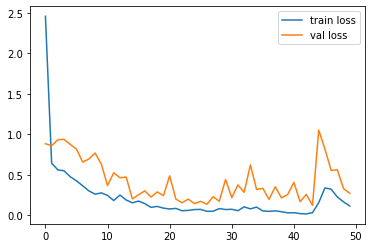

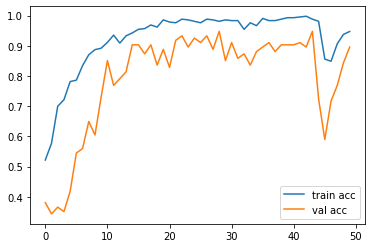

<Figure size 432x288 with 0 Axes>

In [24]:
# plot the loss
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='val loss')
plt.legend()
plt.show()
plt.savefig('LossVal_loss')

# plot the accuracy
plt.plot(r.history['acc'], label='train acc')
plt.plot(r.history['val_acc'], label='val acc')
plt.legend()
plt.show()
plt.savefig('AccVal_acc')

In [25]:
# save it as a h5 file

from tensorflow.keras.models import load_model
model.save('model_vgg19.h5')

In [26]:

y_pred = model.predict(test_set)


In [27]:
y_pred

array([[9.99740899e-01, 2.59093533e-04],
       [6.28098175e-02, 9.37190115e-01],
       [1.34425610e-01, 8.65574300e-01],
       [5.91314852e-01, 4.08685118e-01],
       [2.94730794e-02, 9.70526934e-01],
       [5.61164729e-02, 9.43883538e-01],
       [3.72117087e-02, 9.62788284e-01],
       [9.41813469e-01, 5.81865236e-02],
       [1.00000000e+00, 1.16722512e-14],
       [3.35199125e-02, 9.66480017e-01],
       [9.99999881e-01, 1.03797291e-07],
       [1.00000000e+00, 1.93521768e-10],
       [1.48544043e-01, 8.51455986e-01],
       [3.92002910e-02, 9.60799754e-01],
       [9.99988079e-01, 1.19042061e-05],
       [9.29944277e-01, 7.00557008e-02],
       [4.41945568e-02, 9.55805421e-01],
       [2.56971363e-02, 9.74302828e-01],
       [9.99507785e-01, 4.92223189e-04],
       [4.04881313e-02, 9.59511817e-01],
       [3.37226014e-03, 9.96627748e-01],
       [1.38558466e-02, 9.86144185e-01],
       [1.00000000e+00, 9.26773325e-09],
       [1.27787635e-01, 8.72212350e-01],
       [6.422522

In [28]:
import numpy as np
y_pred = np.argmax(y_pred, axis=1)

In [29]:
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 1,
       0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1], dtype=int64)

In [30]:
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing import image

In [31]:
model=load_model('model_vgg19.h5')

In [33]:
img=image.load_img('Dataset/Dataset/Test/Uninfected/2.png',target_size=(224,224))



In [34]:
x=image.img_to_array(img)
x

array([[[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       ...,

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]],

       [[0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.],
        ...,
        [0., 0., 0.],
        [0., 0., 0.],
        [0., 0., 0.]]], dtype=float32)

In [35]:
x.shape

(224, 224, 3)

In [36]:
x=x/255

In [37]:
x=np.expand_dims(x,axis=0)
img_data=preprocess_input(x)
img_data.shape

(1, 224, 224, 3)

In [38]:
model.predict(img_data)

array([[1., 0.]], dtype=float32)

In [39]:
a=np.argmax(model.predict(img_data), axis=1)

In [40]:
if(a==1):
    print("Uninfected")
else:
    print("Infected")

Infected
